## Unsupervised learning
Autoencoders are a neural network architecture, offering the ability to learn patterns from data **without the need for labeled examples**. 

## Autoencoder
Its main goal is to learn a **compressed** ("encoded") representation of data and then **reconstruct the original data** from that compressed version.

The architecture of an autoencoder consists of two main parts:

1. **Encoder**: The encoder takes the input data (e.g., an image, a sound clip, or a text document) and compresses it into a lower-dimensional representation, known as the **latent space**.

2. **Decoder**: The decoder takes the compressed representation and tries to reconstruct the original input. The goal is to minimize the difference between the original and reconstructed data.

### Choosing Activation Functions
The choice of **activation function** plays an important role in how the model learns. Different types of data (binary, real-valued, etc.) require different activation functions.

**For Binary Inputs**
* **Encoder**: The encoder typically uses **sigmoid** or **tanh** as the activation function to map the input to a compressed representation.
* **Decoder**: Since the reconstructed data should fall within the range $[0, 1]$, the decoder usually uses a **sigmoid** activation function for binary data.

**For Real-Valued Inputs**
* **Encoder**: A **sigmoid** or **tanh** can be used to compress the data into a fixed range.
* **Decoder**: For real-valued data (such as images or continuous signals), the decoder uses a **linear** activation function, allowing the network to output any real number.

### Choosing Loss Function

**MSE** loss function is commonly used for **real-valued inputs**, while **Cross-Entropy Loss** is used for **binary inputs**. It compares the predicted probabilities from the **sigmoid** function to the actual binary values ($0$ or $1$). This is more effective than MSE in cases where the data consists of binary values.

## Applications of Autoencoders
* **Dimensionality Reduction**: Autoencoders are a great tool for reducing the dimensionality of large datasets. Just like **PCA**, they can help compress data into a more compact form without losing crucial information.

* **Anomaly Detection**: By training an autoencoder on a dataset of “normal” data, the model learns to reconstruct typical inputs. When presented with anomalous or new data, the **reconstruction error is higher**, which can be used to identify **outliers**.

* **Denoising (noise reduction)**: Autoencoders can be trained to reconstruct clean data from noisy inputs. This has applications in image and signal processing.

* **Image Compression**: Autoencoders are often used in image compression tasks, where the goal is to reduce the storage requirements for images without losing too much visual quality.

## Implementation
Now, let's implement a simple autoencoder that encodes and reconstructs student academic performance.

### 1. Load the data
Let's read the data file first.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2, suppress = True)

In [30]:
students = pd.read_csv("data/student_info.csv", index_col=0)
students.head()

,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,extra_activities,final_result
student_id,,,,,,,,,,,,
S1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Yes,Fail
S2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,No,Pass
S3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,No,Fail
S4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,No,Pass
S5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,No,Pass


### 2. Preprocess the data

#### 2.1 Encode categorical data
We need to convert the categorical values first into numeric indices.

In [31]:
# Convert categorical values to numeric indices
cols = ['age', 'grade_level', 'gender', 'parent_education', 'internet_access', 'extra_activities', 'final_result']
students[cols] = students[cols].apply(lambda x: x.astype('category').cat.codes)
students.head()

,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,extra_activities,final_result
student_id,,,,,,,,,,,,
S1,2,2,1,74,61,90,94.660002,2,4.120192,1,1,0
S2,1,2,3,99,70,91,93.173227,0,2.886505,0,0,1
S3,2,2,0,59,60,99,98.631098,3,1.909926,0,0,0
S4,2,2,3,70,88,69,96.419620,3,1.664740,0,0,1
S5,1,0,0,85,77,94,91.332105,3,2.330918,1,0,1


In [32]:
students.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,0.993000,0.803490,0.000000,0.000000,1.000000,2.000000,2.000000
age,1000.0,0.999000,0.817109,0.000000,0.000000,1.000000,2.000000,2.000000
grade_level,1000.0,1.473000,1.136029,0.000000,0.000000,1.000000,3.000000,3.000000
math_score,1000.0,75.165000,14.304349,50.000000,63.000000,75.000000,88.000000,99.000000
reading_score,1000.0,74.293000,14.312652,50.000000,62.000000,74.000000,86.000000,99.000000
writing_score,1000.0,75.150000,14.395094,50.000000,63.000000,75.000000,88.000000,99.000000
attendance_rate,1000.0,89.879179,5.725007,80.000614,84.971772,89.980889,94.629778,99.954988
parent_education,1000.0,1.461000,1.142709,0.000000,0.000000,1.000000,3.000000,3.000000
study_hours,1000.0,2.978380,1.167780,1.015673,1.955287,2.962665,3.994360,4.997843
internet_access,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


#### 2.2 Scale the data

We would like to scale all the numeric columns.

In [33]:
# Scale the big numbers (0-100) to be between 0 and 1
cols = ['math_score', 'reading_score', 'writing_score', 'attendance_rate']
students[cols] = students[cols].apply(lambda x: x/100)

# Scale the medium numbers (0-5) to be between 0 and 1
students[['gender', 'age']] = students[['gender', 'age']].apply(lambda x: x/2)
students[['grade_level', 'parent_education']] = students[['grade_level', 'parent_education']].apply(lambda x: x/3)
students['study_hours'] = students['study_hours'].apply(lambda x: x/5)

students.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,0.496500,0.401745,0.000000,0.000000,0.500000,1.000000,1.000000
age,1000.0,0.499500,0.408554,0.000000,0.000000,0.500000,1.000000,1.000000
grade_level,1000.0,0.491000,0.378676,0.000000,0.000000,0.333333,1.000000,1.000000
math_score,1000.0,0.751650,0.143043,0.500000,0.630000,0.750000,0.880000,0.990000
reading_score,1000.0,0.742930,0.143127,0.500000,0.620000,0.740000,0.860000,0.990000
writing_score,1000.0,0.751500,0.143951,0.500000,0.630000,0.750000,0.880000,0.990000
attendance_rate,1000.0,0.898792,0.057250,0.800006,0.849718,0.899809,0.946298,0.999550
parent_education,1000.0,0.487000,0.380903,0.000000,0.000000,0.333333,1.000000,1.000000
study_hours,1000.0,0.595676,0.233556,0.203135,0.391057,0.592533,0.798872,0.999569
internet_access,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


### 3. Initialize Autoencoder

#### 3.1 Initialize the layers
The most important part for an autoencoder are the layer sizes.

In [34]:
input_layer_size = 12       # Number of input features
hidden_layer_size = 6       # Number of neurons in the hidden layer (compressed representation)
output_layer_size = 12      # Number of output (decoded) features

#### 3.2 Initialize the weights
Let's set random values for weights and zero values for biases.

### TODO: Add diagram here

In [35]:
# Initialize the weights
weights = [np.random.randn(input_layer_size, hidden_layer_size), np.random.randn(hidden_layer_size, output_layer_size)]

# Initialize the biases
biases = [[np.zeros(hidden_layer_size)], np.zeros(output_layer_size)]

### 4. Activation function
Let's use a simple sigmoid function, since its unversal (can be used for binary or real-valued inputs).

In [36]:
def sigmoid(X: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-X))

def sigmoid_derivative(X: np.ndarray) -> np.ndarray:
    return X * (1 - X)

### 5. Feedforward
We'll need a method that feeds the neural network in forward direction.

In [37]:
def forward(X: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    # Encoder (m, n) @ (n, hidden_size) = (m, hidden_size) + (hidden_size, 1) = (m, hidden_size)
    hidden = sigmoid(np.dot(X, weights[0]) + biases[0])
    # Decoder (m, hidden_size) @ (hidden_size, n) = (m, n) + (n, 1) = (m, n)    
    output = sigmoid(np.dot(hidden, weights[1]) + biases[1])
    return hidden, output

### 6. Backward propagation
And we'll need a method that calculates the gradient and propagates the error back (and modify the weights accordingly).

In [38]:
def backward(X: np.ndarray, hidden: np.ndarray, output: np.ndarray, learn_rate: float):
    # Calculate gradients
    output_error = output - X # (m, n) - (m, n) = (m, n)
    output_delta = output_error * sigmoid_derivative(output) # (m, n) * (m, n) = (m, n)

    hidden_error = np.dot(output_delta, weights[1].T) # (m, n) @ (n, hidden_size) = (m, hidden_size)
    hidden_delta = hidden_error * sigmoid_derivative(hidden) # (m, hidden_size) * (m, hidden_size) = (m, hidden_size)

    # Update weights and biases
    weights[1] -= learn_rate * np.dot(hidden.T, output_delta) # (hidden_size, m) @ (m, n) = (hidden_size, n)
    biases[1] -= learn_rate * np.sum(output_delta) # (n, 1)

    weights[0] -= learn_rate * np.dot(X.T, hidden_delta) # (n, m) @ (m, hidden_size) = (n, hidden_size)
    biases[0] -= learn_rate * np.sum(hidden_delta) # (hidden_size, 1)

### 7. Train the autoencoder

In [39]:
epochs = 150000
learning_rate = 0.0005
losses = []
students_numpy = students.to_numpy()

for epoch in range(epochs):
    # # Shuffle the data
    X = students_numpy[np.random.permutation(len(students_numpy))]

    # Forward pass
    hidden, output = forward(X) # (m, hidden_size), (m, n)

    # Calculate loss (MSE)
    loss = np.mean(np.square(output - X))
    losses.append(loss)
    if epoch % 5000 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

    # Backward pass
    backward(X, hidden, output, learning_rate)

Epoch 1, Loss: 0.2137
Epoch 5001, Loss: 0.0255
Epoch 10001, Loss: 0.0232
Epoch 15001, Loss: 0.0225
Epoch 20001, Loss: 0.0221
Epoch 25001, Loss: 0.0218
Epoch 30001, Loss: 0.0216
Epoch 35001, Loss: 0.0214
Epoch 40001, Loss: 0.0213
Epoch 45001, Loss: 0.0212
Epoch 50001, Loss: 0.0211
Epoch 55001, Loss: 0.0210
Epoch 60001, Loss: 0.0209
Epoch 65001, Loss: 0.0208
Epoch 70001, Loss: 0.0207
Epoch 75001, Loss: 0.0207
Epoch 80001, Loss: 0.0206
Epoch 85001, Loss: 0.0206
Epoch 90001, Loss: 0.0205
Epoch 95001, Loss: 0.0205
Epoch 100001, Loss: 0.0204
Epoch 105001, Loss: 0.0204
Epoch 110001, Loss: 0.0203
Epoch 115001, Loss: 0.0203
Epoch 120001, Loss: 0.0203
Epoch 125001, Loss: 0.0202
Epoch 130001, Loss: 0.0202
Epoch 135001, Loss: 0.0201
Epoch 140001, Loss: 0.0201
Epoch 145001, Loss: 0.0201


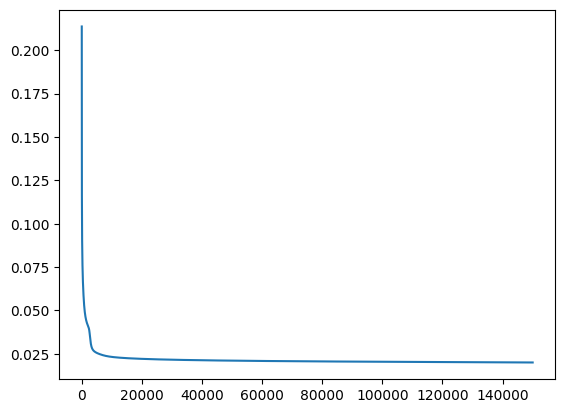

In [40]:
# Plot the losses
plt.plot(losses)
plt.show()

In [80]:
# Now let's test the autoencoder with a simple example.
student = students_numpy[5]
student_str = " ".join(f"{x:.2f}" for x in student)
print(f"Original: {student_str}")
encoded, decoded = forward([student])
decoded_str = " ".join(f"{x:.2f}" for x in decoded[0])
print(f"Decoded:  {decoded_str}")

Original: 0.50 1.00 0.67 0.61 0.54 0.89 0.93 0.67 0.95 0.00 1.00 0.00
Decoded:  0.66 0.93 0.44 0.82 0.82 0.81 0.89 0.68 0.76 0.02 1.00 0.00
